In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
m6_nrt = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')

In [3]:
m6_nrt['acq_date'] = pd.to_datetime(m6_nrt['acq_date'])-pd.to_timedelta(7, unit='d')
def date_seperating(df, sel): 
    '''splits dataframes into weeks, months, years'''
    out = []
    if 'D' in sel:
        out.append([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))])
    if 'W' in sel:
        out.append([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))])
    if 'M' in sel:
        out.append([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))])
    if 'Y' in sel:
        out.append([g for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
    return out   

In [5]:
days = date_seperating(m6_nrt, 'D')

In [6]:
X = np.array(days[0][0][['latitude','longitude']])
Y = np.array(days[0][1][['latitude','longitude']])

In [7]:
kmeans = KMeans(n_clusters=15).fit_predict(X)    

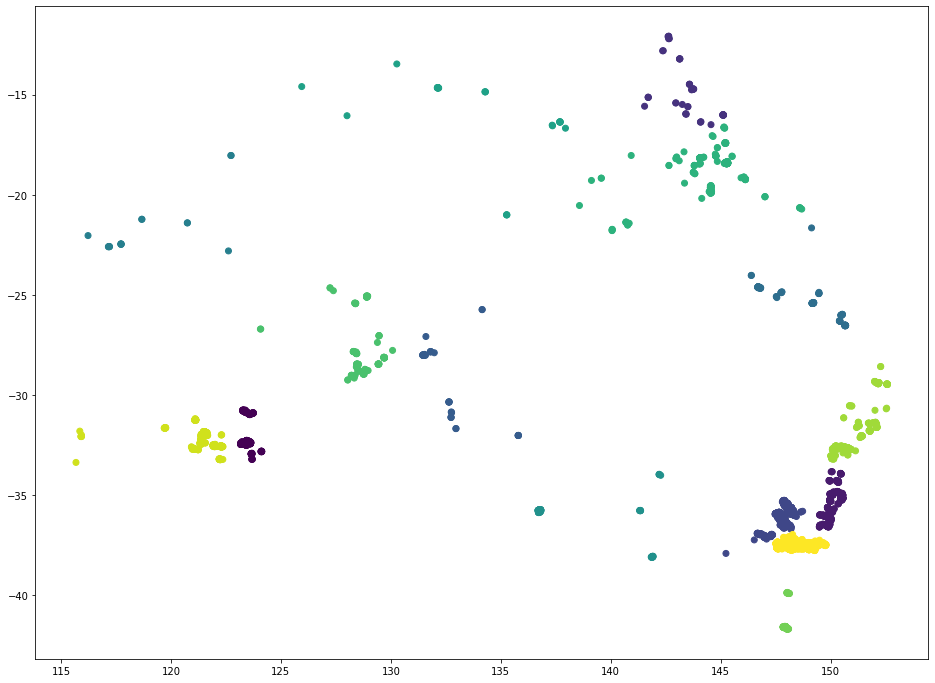

In [10]:
plt.figure(figsize = (16,12))
plt.scatter(X[:, 1], X[:, 0], c=kmeans)

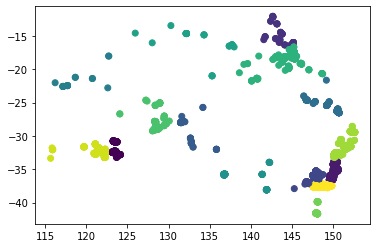

In [12]:
plt.figure()
plt.scatter(days[0][0].longitude, days[0][0].latitude, c=kmeans)